## Introduction
+ Investigate no show appointments
+ This data contains a lot of information about the patients , their appointments dates and weather they came for the appointment or not.

+ The data is collected from the medical appointments in the Brazil

## Questions to be analysed :-
+ Main focus of the questions is to find out what all factors affect the patients attending the appointments or not
+ What is the impact of neighbourhood on the patients attending the appointment or not?
+ What is the impact of Age of patients on the patients attending the appointment or not?
+ What is show or not show of Day of Week?
+ what is No-show By Age Group and Scholarship?

## Dataset Description: 
+ This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

+ PatientId: indicates the patient ID; duplication is possible due to cases where the same patient booked more than one appointment.
+ AppointmentID: indicates appoint ID, this field should be unique
+ Gender: indicates the patient's gender (M/F)
+ ScheduledDay: indicates the Date/Time the patient set up their appointment.
+ AppointmentDay: indicates the date/time the patient called to book their appointment.
+ Age: indicates the patient's age.
+ Neighborhood: indicates the location of the hospital.
+ Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
+ Hipertension: indicates whether or not the patient is experiencing Hypertension.
+ Diabetes: indicates whether or not the patient is experiencing Diabetes.
+ Alcoholism: indicates whether or not the patient is experiencing Alcoholism.
+ Handcap: indicates whether or not the patient is with special needs.
+ SMS_received: indicates whether or not the patient has received a reminder text message.
+ Show-up: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


> I will use :
1. numpy
2. pandas
3. matplotlib
4. seaborn

In [1]:
# Use this cell to set up import statements for all of the packages that you
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('./Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head(3)

# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.shape

df.isnull().sum()

# Check for duplicate rows 
df.duplicated().sum()

sum(df.AppointmentID.duplicated())

#explore Data
df[df.AppointmentID < 0]['AppointmentID']
df[df.PatientId <= 0]['PatientId']
df['Gender'].unique()
df['ScheduledDay'].unique()
df['AppointmentDay'].unique()
df['Age'].unique()
df[df.Age < 0]['Age']
df['Neighbourhood'].unique()
df['Neighbourhood'].nunique()
df['Scholarship'].unique()
df['Hipertension'].unique()
df['Diabetes'].unique()
df['Alcoholism'].unique()
df['Handcap'].unique()
df['SMS_received'].unique()
df['No-show'].unique()


array(['No', 'Yes'], dtype=object)


### Data Cleaning

In [3]:
# Rename Columns
df.columns = ['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Status']

In [4]:
# Convert PatientID to integer 
df['PatientID'] = (df['PatientID']).astype('int64')

In [5]:
# Convert AppointmentDay and ScheduledDay from String to DateTime format, and 
# create 2 columns for: appointment booking date and the appointment date. 
# Note: Since the Appointment times were set to 00:00:00 in all the appointments, 
# our analysis won't include the appointment time.

# Appointment Date
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['DayofWeek'] = pd.to_datetime(df['AppointmentDay']).dt.weekday_name
df.drop('AppointmentDay',axis=1, inplace = True)
# Appointment Booking Date
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDay']).dt.date
df.drop('ScheduledDay',axis=1, inplace = True)

In [6]:
# Create a new column to show the Waiting Duration (in days) between the scheduling date and appointment date 
df['WaitingDuration'] = df.AppointmentDate - df.ScheduledDate
df[df['WaitingDuration'] < '0 days']
# Exclude the 5 records with the negative waiting duration, the new dataset size is 110527 - 5 = 110522

df = df[df['AppointmentDate'] >= df['ScheduledDate']]
df = df[df.Age != -1]


In [7]:
# Update the values in the status, gender, scholarship, hypertension, diabetes, alcoholism, SMS_received columns
# to make them more user friendly

df['Status'] = df.Status.astype('category')
df.Status.cat.rename_categories(['Show','NoShow'], inplace = True)

df['Gender'] = df.Gender.astype('category')
df.Gender.cat.rename_categories(['Female','Male'], inplace = True)

df['Scholarship'] = df.Scholarship.astype('category')
df.Scholarship.cat.rename_categories(['No Scholarship','Scholarship'], inplace = True)

df['Hypertension'] = df.Hypertension.astype('category')
df.Hypertension.cat.rename_categories(['No Hypertension','Hypertension'], inplace = True)

df['Diabetes'] = df.Diabetes.astype('category')
df.Diabetes.cat.rename_categories(['No Diabetes','Diabetes'], inplace = True);

df['Alcoholism'] = df.Alcoholism.astype('category')
df.Alcoholism.cat.rename_categories(['No Alcoholism','Alcoholism'], inplace = True);

df['SMS_received'] = df.SMS_received.astype('category')
df.SMS_received.cat.rename_categories(['No SMS_received','SMS_received'], inplace = True);


In [8]:
# Define a new column to include the Age Groups

AgeGroupLabels = [ "{0} - {1}".format(i, i + 19) for i in range(0, 120, 20)]
df['AgeGroup'] = pd.cut(df.Age, range(0, 121, 20), right=False, labels=AgeGroupLabels)
df['AgeGroup'] = df.AgeGroup.astype('category')
df.AgeGroup.cat.categories



Index(['0 - 19', '20 - 39', '40 - 59', '60 - 79', '80 - 99', '100 - 119'], dtype='object')

In [9]:
# Create a new dataframe to limit patients to those who are based in one of the top 20 neibhourhoods 
# with the highest numbers of appointments.

## Step one: Create a list of the top 20 neibhourhoods with the highest numbers of appointments.

top_20_Nbrhd_list = list(df['Neighbourhood'].value_counts().nlargest(20).index)

## Step two: Create a new dataframe based on the list above

df_top_20_Nbrhd = df[df['Neighbourhood'].isin (top_20_Nbrhd_list)]

## Step three: apply filteration on the Status column to include the NoShow records only

df_top_20_Nbrhd_NoShow = df_top_20_Nbrhd[df_top_20_Nbrhd['Status']=='NoShow']

In [10]:
# Create a funtion to generate a bar plot the frequency table 
# generated by the Show_NoShow_by_Group function.

def Show_No_Show_bar_plot(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.Status, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('\nShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return df_by_Group


In [11]:

# An updated version of Show_No_Show_bar_plot with different font formatting 
# to match the number of column categories 


def Show_No_Show_bar_plot_V2(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.Status, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(stacked = True, figsize=(20,10));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 45, fontsize = 12);
    ax.set_title('ShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2,
                str(height)+'%',
                ha='center',
                va='bottom',
                fontsize = 12)
    return df_by_Group

In [12]:
# Create a funtion to calculate the plot the group proportions based on one variable by number of appointments
def NumOfPatients(df, variable):
    PatID_Count = pd.pivot_table(df, index=variable, values='PatientID',aggfunc = lambda x: len(x.unique()))
    ax = PatID_Count.plot.pie(figsize=(10,10), autopct='%1.2f%%', subplots=True, fontsize = 12, legend = False);
    plt.title(variable + ' (%) (Per patient)\n', fontsize = 15);
    return np.round(PatID_Count/sum(PatID_Count['PatientID'])*100,2)

In [13]:
# Create a function to plot the noshow-up % for two variables (i.e. gender and hypertention)

def NoShowBy2Vars(df,var1, var2):
    Freq_df = pd.crosstab(df[var1], columns = df[var2], normalize = 'index')
    Freq_df = np.round(Freq_df * 100,2)
    ax = Freq_df.plot.barh(stacked = True,figsize=(10,5));
    ax.set_title('\nNo ShowUp (%) (by ' + str(var1) + ' & '+ str(var2) + ')\n', fontsize = 15);
    ax.set_ylabel(Freq_df.index.name, fontsize = 12)
    ax.set_xlabel('(%)', fontsize = 12)
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    return Freq_df

# What is the ratio of Neighbourhood?

,PatientID
Neighbourhood,
ANDORINHAS,3.12
BONFIM,4.45
CARATOÍRA,4.03
CENTRO,5.15
DA PENHA,3.62
ILHA DO PRÍNCIPE,3.03
ITARARÉ,5.89
JABOUR,3.95
JARDIM CAMBURI,11.56


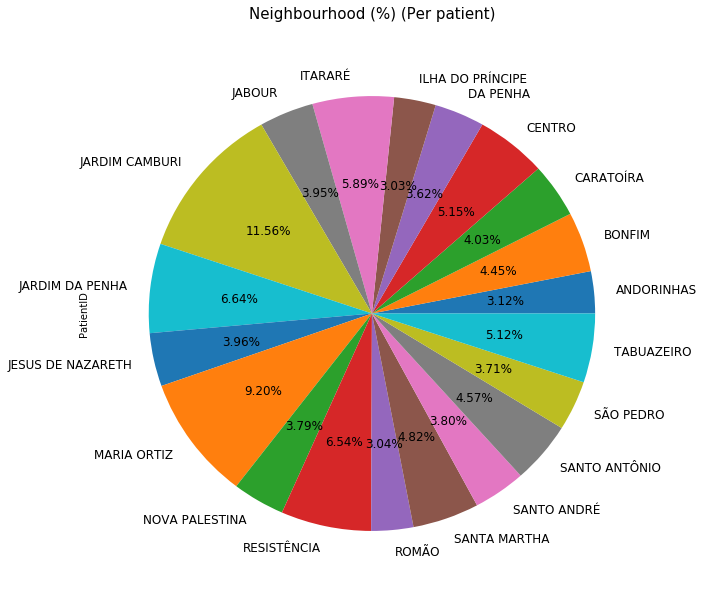

In [14]:
NumOfPatients(df_top_20_Nbrhd, 'Neighbourhood')

## What is the Show/No-Show By Neighbourhood?

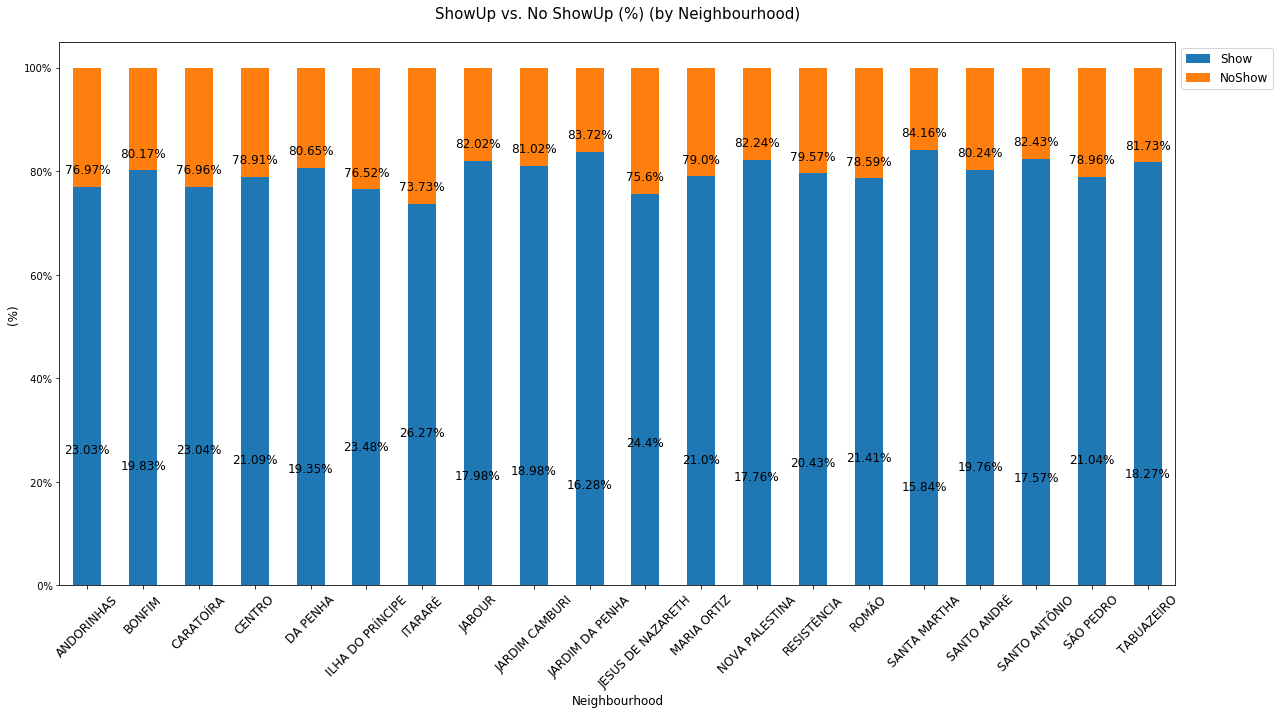

In [15]:
df_Nbrhd = Show_No_Show_bar_plot_V2(df_top_20_Nbrhd,'Neighbourhood')

### Based on the initial analysis above, we found that:

>>The proportion of appointments where patients are based JARDIM CAMBURI is the largest among other neighbourhoods with 11.94%, >>where DA PENHA and ROMÃO is the smallest with 0.01%
>>Same applies to the number of patients.
>>The Show-up rate of SANTA MARTHA (per no. of appointments) is the highest with 84.16%, where the show-up rate of ITARARÉ is ?>>the lowest with 73.73%

# What is the show ratio for age groups?

,PatientID
AgeGroup,
0 - 19,28.89
20 - 39,25.30
40 - 59,26.25
60 - 79,16.40
80 - 99,3.16
100 - 119,0.01


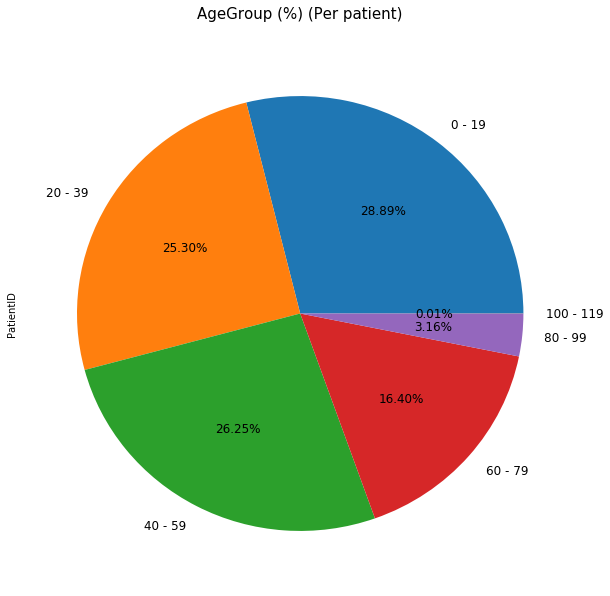

In [16]:
NumOfPatients(df, 'AgeGroup')

>> Looking at the chart above, we find that 28.89% of the patients are from the age group (0 - 19) where only 0.01% of the patients are from the age group (100 - 119). These proportions are very close the proportions we got when calculating the proportions (by appointments).

## What is the Show/No-Show By Age Group?

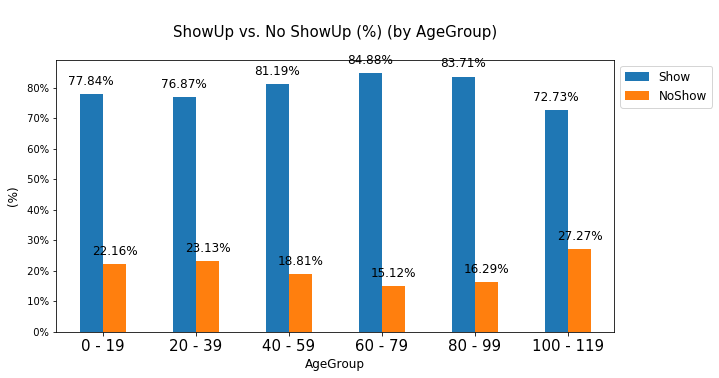

In [17]:
df_AgeGroup = Show_No_Show_bar_plot(df, 'AgeGroup')

## What is show or not show of Day of Week?

,PatientID
DayofWeek,
Friday,17.28
Monday,20.52
Saturday,0.04
Thursday,16.29
Tuesday,22.99
Wednesday,22.88


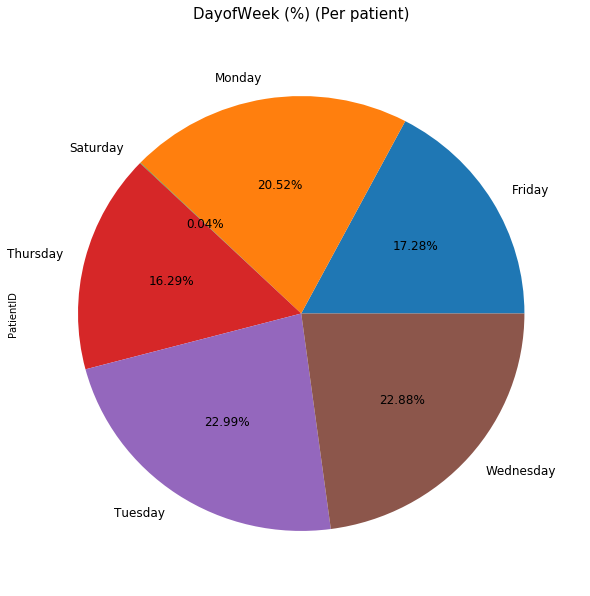

In [18]:
NumOfPatients(df, 'DayofWeek')

>> Looking at the chart above, we find that 22.99% of the patients are scheduled to come on a Tuesday, which is slightly close to the proportion we got when calculating the proportions (by appointments).

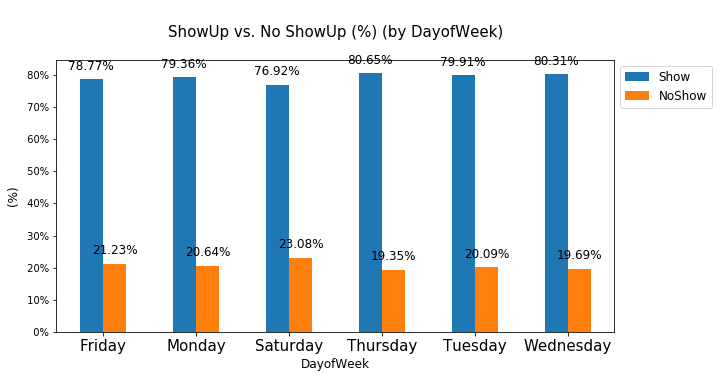

In [19]:
df_WtngDur = Show_No_Show_bar_plot(df, 'DayofWeek')

>> Looking at the chart above, we notice that patients who have their appointments on Thursday (15.60% of the total population) have the highest show-up rate of 80.65% (higher than the average show-up rate), where patients who have their appointments on Saturday (0.04% of the total population) have the lowest show-up rate of 76.92% (less than the average show-up rate).

In [20]:
# select No Show df.
NoShow_df = df[df['Status'] == 'NoShow']

# what is No-show By Age Group and Scholarship?

Scholarship,No Scholarship,Scholarship
AgeGroup,,
0 - 19,87.55,12.45
20 - 39,84.77,15.23
40 - 59,88.90,11.10
60 - 79,96.55,3.45
80 - 99,99.82,0.18
100 - 119,100.00,0.00


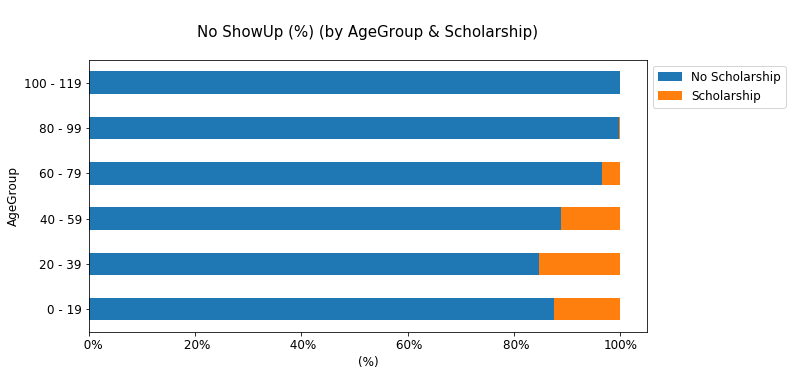

In [21]:
NoShowBy2Vars(NoShow_df,'AgeGroup' ,'Scholarship')

> Looking at the No ShowUp (%) chart, we found that:

>Age group (20-39) has the highest percentage (15.23%) of NoShow appointments where patients have a scholarship;
Age group (100 - 119) has the highest percentage (100%) of NoShow appointments where patients have no scholarship;
Looking at the Recurring patients (%) chart, we found that:

>Age group (0-19) has the highest percentage (26.34%) of recurring patients who have a scholarship.
 Age group (100-119) has the highest percentage (66.67%) of recurring patients who have no scholarship.

## Conclusions
+ As mentioned above, this analysis is not meant to be providing a final conclusion on the reasons leading to patients missing their appointments as it doesn't involve using any inferential statistics techniques/machine learning algorithms; the scope of this project has been customized to meet specific objectives; and the project will be revisited as we progress in the course and utilize more advanced data analysis techniques/algorithms.

### Limitations & Assumptions:

+ Most of the calculations performed in this project are based on the number of apppointments not patients. The calculations where number of patients is referenced are explicitly highlighted.
+ We were not able to address the time dimenion as the appointments times were set to 00:00:00
+ As we were not able to obtain sufficient explanation on specific cases where data was not consistent, we've excluded 6 data entries from the original dataset. original size 110527; new size: 110521
+ As most of the columns represent categorical data, and given the type of questions/analysis selected, the visualization charts were mainly (stacked) bar charts, pie charts; Histograms and other quantitative-related charts such as scatter diagrams, were excluded from this project to the same reason above.

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255